# Titanic Survival Prediction Model

In [133]:
# Import Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

 Data Filtering

In [134]:
# Load Data
titanic_data = pd.read_csv('/content/Data/train.csv')

In [135]:
# Load the Head for reference
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
# Load the shape of the dataframe
titanic_data.shape

(891, 12)

In [137]:
# Check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
# Handle the missing data in Cabin / Age
# Since Cabin column is missing for majority of the data, therefore I drop it
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [139]:
# Then replace all the missing age value with mean value for age
titanic_age_mean = titanic_data['Age'].mean()
titanic_data['Age'].fillna(titanic_age_mean, inplace = True)

In [140]:
# Lastly fill the Embark with the most commonly appeared value, aka mode
titanic_embark_mode = titanic_data['Embarked'].mode()
titanic_data['Embarked'].fillna(titanic_embark_mode[0], inplace = True)

In [141]:
# Check Again for null
# titanic_data.isnull().sum()

Data Analysis

In [142]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [143]:
# Find the number that survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [144]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

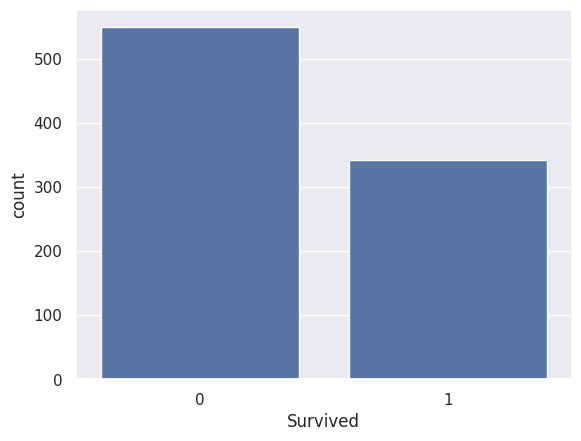

In [145]:
# Count plot for 'Survived' column
sns.countplot(x = 'Survived', data = titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

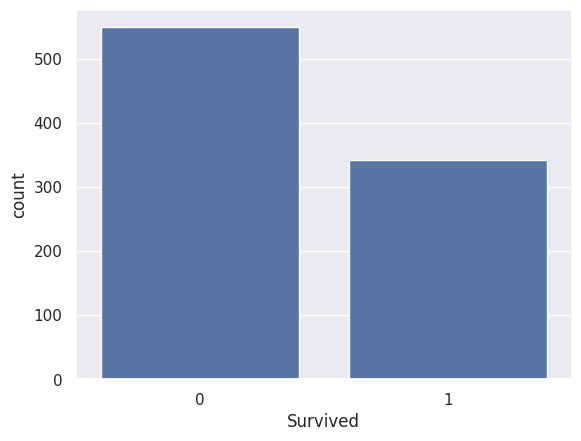

In [146]:
# Count plot for 'Set' column
sns.countplot(x = 'Survived', data = titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

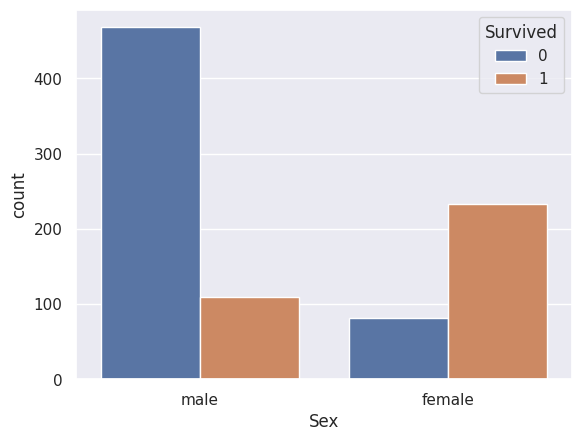

In [147]:
# Number of Survivor Gender wise
sns.countplot(x='Sex', hue='Survived',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

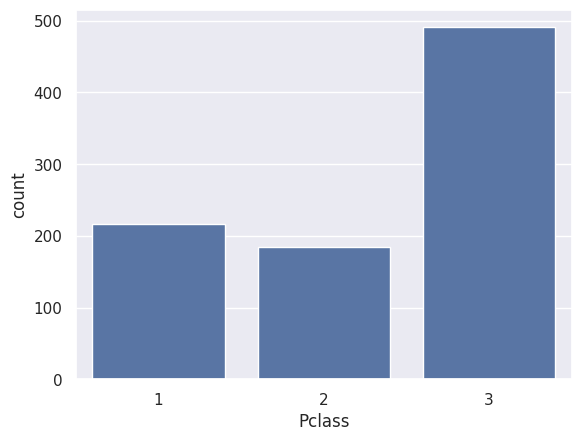

In [148]:
# Count graph for Pclass
sns.countplot(x='Pclass',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

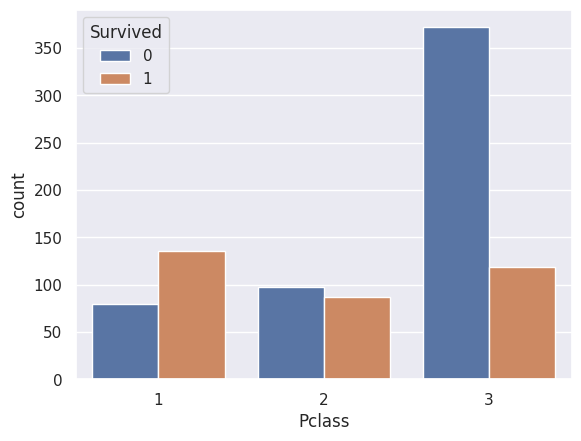

In [149]:
# Number of Survivor via class
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

Converting Data Type for Model to use

In [150]:
#  Replace male and female with numerical value and then replace Embarked with numerical value

# Converting categorical to numerical
titanic_data['Sex'] = titanic_data['Sex'].replace({'male':0, 'female':1})
titanic_data['Embarked'] = titanic_data['Embarked'].replace({'S':0, 'C':1, 'Q':2})


In [151]:
# Drop the name, passengerId and Ticket columns since they are not important
x = titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'], axis=1)
y = titanic_data['Survived']

Split dataset into Train and test data

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Apply Logistic Regression

In [153]:
model = LogisticRegression()

In [154]:
# train logistic regression model using training data
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluate

In [155]:
# accuracy on training data

x_train_accuracy = model.predict(x_train)
# print(x_train_accuracy)
training_data_accuracy = accuracy_score(y_train, x_train_accuracy)
print("training data accuracy: ", training_data_accuracy)

training data accuracy:  0.7893258426966292


In [156]:
# accuracy on test data

x_test_accuracy = model.predict(x_test)
# print(x_train_accuracy)
test_data_accuracy = accuracy_score(y_test, x_test_accuracy)
print("test data accuracy: ", test_data_accuracy)

test data accuracy:  0.8268156424581006
